In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
DF1 = pd.read_csv('../data/Sleep_health_and_lifestyle_dataset.csv')
DF1


,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


In [3]:
DF1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [4]:
DF2= DF1.copy()

In [5]:
DF2[DF2['Occupation'] == 'Software Engineer']

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
5,6,Male,28,Software Engineer,5.9,4,30,8,Obese,140/90,85,3000,Insomnia
84,85,Male,35,Software Engineer,7.5,8,60,5,Normal Weight,120/80,70,8000,NaN
92,93,Male,35,Software Engineer,7.5,8,60,5,Normal Weight,120/80,70,8000,NaN


In [6]:
DF2['BMI Category'].unique()

array(['Overweight', 'Normal', 'Obese', 'Normal Weight'], dtype=object)

In [7]:
DF1['Sleep Disorder'] = DF1['Sleep Disorder'].replace(np.nan, 'none')

In [8]:
DF1['Occupation'].value_counts()

Occupation
Nurse                   73
Doctor                  71
Engineer                63
Lawyer                  47
Teacher                 40
Accountant              37
Salesperson             32
Software Engineer        4
Scientist                4
Sales Representative     2
Manager                  1
Name: count, dtype: int64

In [9]:
# 10개 이하 직업 포괄시키기
DF1['Occupation'] = DF1['Occupation'].replace({'Software Engineer':'Engineer', 'Sales Representative':'Salesperson', 'Scientist':'Doctor', 'Manager':'Lawyer'})

In [10]:
# 직업 11개를 숫자로 치환
DF1['Occupation'] = DF1['Occupation'].replace({'Doctor':0, 'Teacher':1, 'Nurse':2, 'Engineer':3, 'Accountant':4, 'Salesperson':5, 'Lawyer':6})

In [45]:
DF1.corr(numeric_only=True)

,Person ID,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps,Sleep Disorder
Person ID,1.000000,0.990516,0.181255,0.296305,0.431612,0.149882,-0.394287,-0.225467,0.043844,0.341406
Age,0.990516,1.000000,0.158716,0.344709,0.473734,0.178993,-0.422344,-0.225606,0.057973,0.303962
Occupation,0.181255,0.158716,1.000000,0.126920,0.222782,0.078425,-0.160912,-0.071424,0.039729,0.030225
Sleep Duration,0.296305,0.344709,0.126920,1.000000,0.883213,0.212360,-0.811023,-0.516455,-0.039533,-0.382045
Quality of Sleep,0.431612,0.473734,0.222782,0.883213,1.000000,0.192896,-0.898752,-0.659865,0.016791,-0.357477
Physical Activity Level,0.149882,0.178993,0.078425,0.212360,0.192896,1.000000,-0.034134,0.136971,0.772723,-0.109225
Stress Level,-0.394287,-0.422344,-0.160912,-0.811023,-0.898752,-0.034134,1.000000,0.670026,0.186829,0.181296
Heart Rate,-0.225467,-0.225606,-0.071424,-0.516455,-0.659865,0.136971,0.670026,1.000000,-0.030309,0.220913
Daily Steps,0.043844,0.057973,0.039729,-0.039533,0.016791,0.772723,0.186829,-0.030309,1.000000,-0.161275
Sleep Disorder,0.341406,0.303962,0.030225,-0.382045,-0.357477,-0.109225,0.181296,0.220913,-0.161275,1.000000


In [11]:
DF1

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,3,6.1,6,42,6,Overweight,126/83,77,4200,none
1,2,Male,28,0,6.2,6,60,8,Normal,125/80,75,10000,none
2,3,Male,28,0,6.2,6,60,8,Normal,125/80,75,10000,none
3,4,Male,28,5,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,5,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,2,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,371,Female,59,2,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,372,Female,59,2,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,373,Female,59,2,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


['Doctor', 'Teacher', 'Nurse', 'Engineer', 'Accountant', 'Lawyer', 'Salesperson']


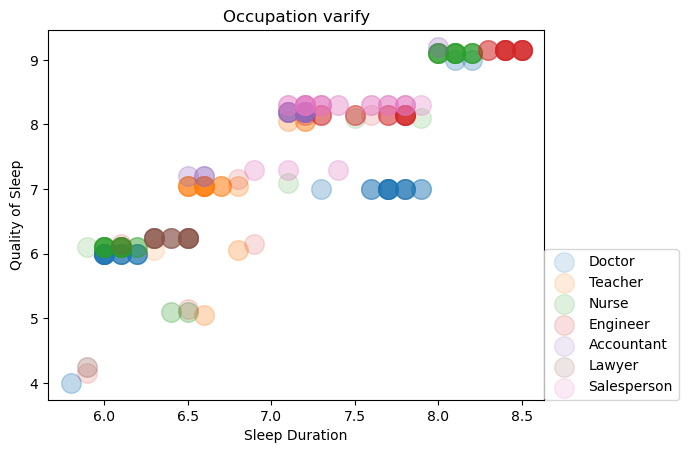

In [52]:
occupationList = ['Doctor', 'Teacher', 'Nurse', 'Engineer', 'Accountant', 'Lawyer', 'Salesperson']
print(occupationList)
for a in range(7):
    plt.scatter(DF1[DF1['Occupation']==a]['Sleep Duration'], DF1[DF1['Occupation']==a]['Quality of Sleep']+(a/20), label=occupationList[a],alpha=0.15 ,s=200)
plt.title('Occupation varify')
plt.xlabel('Sleep Duration')
plt.ylabel('Quality of Sleep')
plt.legend(loc=(1,0))
plt.show()

In [13]:
# 수면장애 - 없음: 0, 수면무호흡증: 1, 불면증 : 2
DF1['Sleep Disorder'] = DF1['Sleep Disorder'].replace({'none':0, 'Sleep Apnea':1, 'Insomnia':2})

In [14]:
DF1['Sleep Disorder'].unique()

array([0, 1, 2], dtype=int64)

In [15]:
DF2['Occupation'].value_counts()

Occupation
Nurse                   73
Doctor                  71
Engineer                63
Lawyer                  47
Teacher                 40
Accountant              37
Salesperson             32
Software Engineer        4
Scientist                4
Sales Representative     2
Manager                  1
Name: count, dtype: int64

전처리 과정에서 10개 보다 작은 것들은 어딘가에 포함시키거나 제거시켜야함

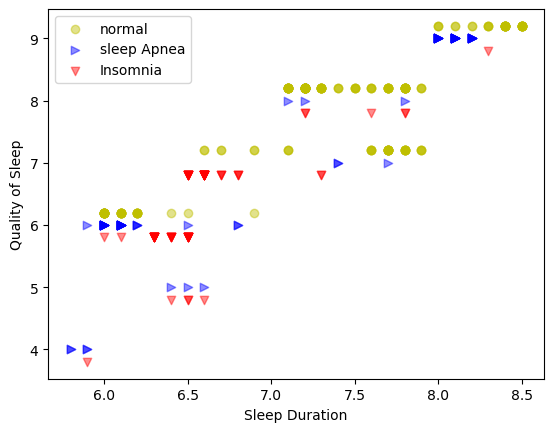

In [16]:
plt.scatter(DF1[DF1['Sleep Disorder']==0]['Sleep Duration'], DF1[DF1['Sleep Disorder']==0]['Quality of Sleep']+0.2, c='y',alpha=0.45, label = 'normal', marker='o')
plt.scatter(DF1[DF1['Sleep Disorder']==1]['Sleep Duration'], DF1[DF1['Sleep Disorder']==1]['Quality of Sleep'], c='b',alpha=0.45, label = 'sleep Apnea', marker='>')
plt.scatter(DF1[DF1['Sleep Disorder']==2]['Sleep Duration'], DF1[DF1['Sleep Disorder']==2]['Quality of Sleep']-0.2, c='r',alpha=0.45, label='Insomnia', marker='v')
plt.xlabel('Sleep Duration')
plt.ylabel('Quality of Sleep')
plt.legend()
plt.show()

In [17]:
DF1.Occupation

0      3
1      0
2      0
3      5
4      5
      ..
369    2
370    2
371    2
372    2
373    2
Name: Occupation, Length: 374, dtype: int64

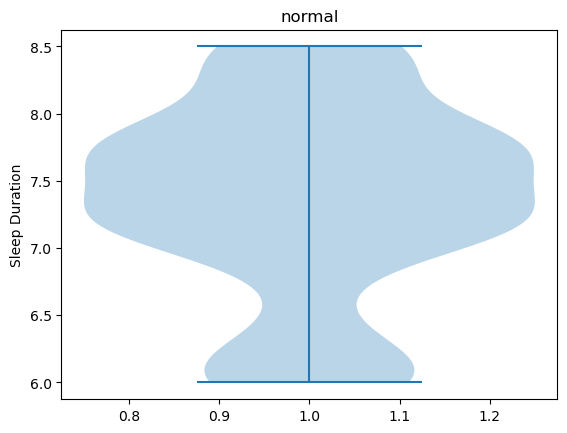

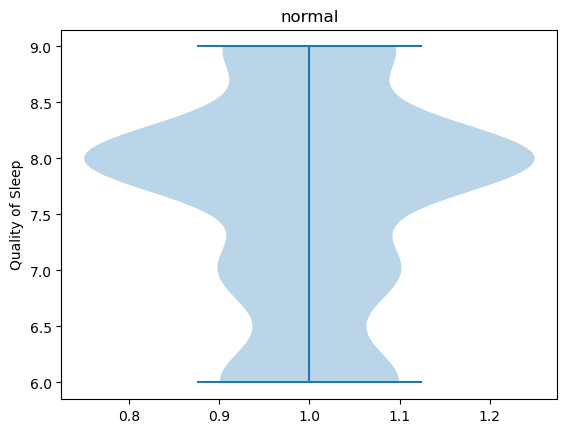

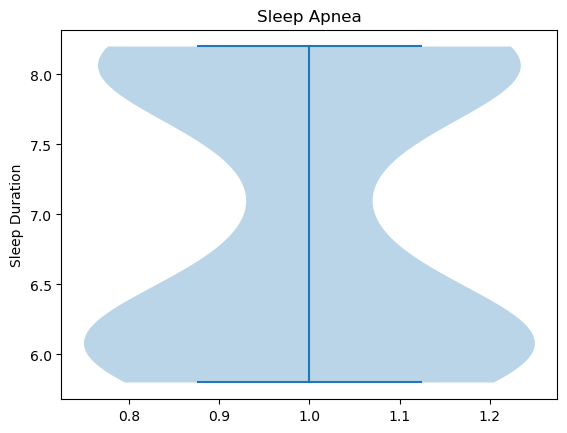

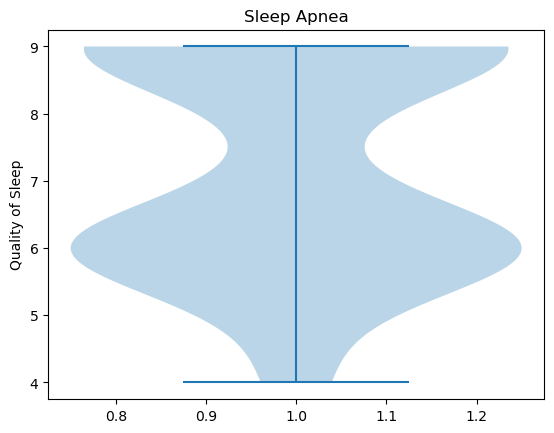

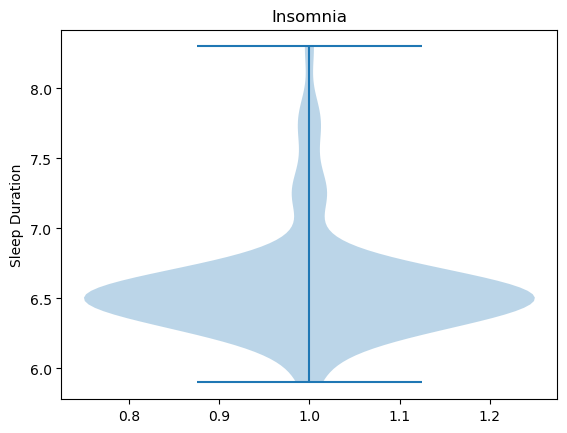

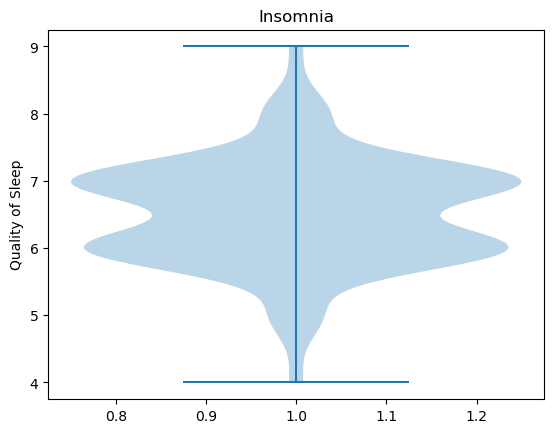

In [90]:
list1 = ['normal', 'Sleep Apnea', 'Insomnia']
for i in range(3):
    plt.violinplot(DF1[DF1['Sleep Disorder']==i]['Sleep Duration'])
    plt.ylabel('Sleep Duration')
    plt.title(list1[i])
    plt.show()
    plt.violinplot(DF1[DF1['Sleep Disorder']==i]['Quality of Sleep'])
    plt.ylabel('Quality of Sleep')
    plt.title(list1[i])
    plt.show()

In [19]:
# plt.show()
# for i in range(3):
#     plt.violinplot(DF1[DF1['Sleep Disorder'] == i]['Heart Rate'])
#     plt.title('Heart Rate')
#     plt.show()

In [20]:
DF1.corr(numeric_only=True)

,Person ID,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps,Sleep Disorder
Person ID,1.000000,0.990516,0.181255,0.296305,0.431612,0.149882,-0.394287,-0.225467,0.043844,0.341406
Age,0.990516,1.000000,0.158716,0.344709,0.473734,0.178993,-0.422344,-0.225606,0.057973,0.303962
Occupation,0.181255,0.158716,1.000000,0.126920,0.222782,0.078425,-0.160912,-0.071424,0.039729,0.030225
Sleep Duration,0.296305,0.344709,0.126920,1.000000,0.883213,0.212360,-0.811023,-0.516455,-0.039533,-0.382045
Quality of Sleep,0.431612,0.473734,0.222782,0.883213,1.000000,0.192896,-0.898752,-0.659865,0.016791,-0.357477
Physical Activity Level,0.149882,0.178993,0.078425,0.212360,0.192896,1.000000,-0.034134,0.136971,0.772723,-0.109225
Stress Level,-0.394287,-0.422344,-0.160912,-0.811023,-0.898752,-0.034134,1.000000,0.670026,0.186829,0.181296
Heart Rate,-0.225467,-0.225606,-0.071424,-0.516455,-0.659865,0.136971,0.670026,1.000000,-0.030309,0.220913
Daily Steps,0.043844,0.057973,0.039729,-0.039533,0.016791,0.772723,0.186829,-0.030309,1.000000,-0.161275
Sleep Disorder,0.341406,0.303962,0.030225,-0.382045,-0.357477,-0.109225,0.181296,0.220913,-0.161275,1.000000


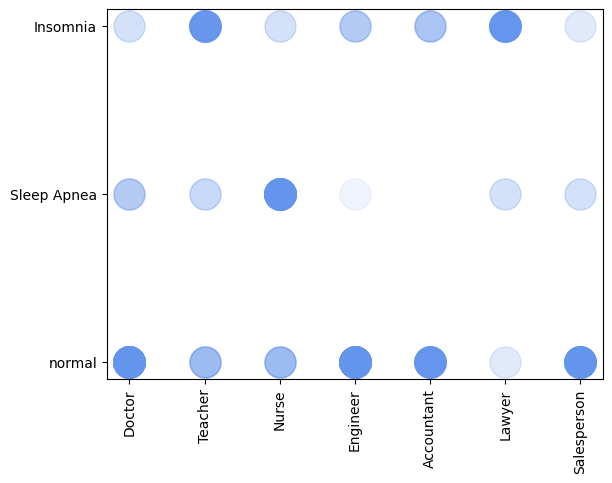

In [21]:

plt.scatter(DF1.Occupation, DF1['Sleep Disorder'], alpha=0.1, c='cornflowerblue', s=500)
plt.xticks(ticks=range(DF1.Occupation.min(), DF1.Occupation.max()+1), labels=['Doctor', 'Teacher', 'Nurse', 'Engineer', 'Accountant', 'Lawyer', 'Salesperson'], rotation=90)
plt.yticks(ticks=[0,1,2],labels=['normal','Sleep Apnea','Insomnia'])
plt.show()

In [22]:
featureDF = DF1[['Age','Heart Rate','Sleep Duration','Quality of Sleep','Stress Level','Daily Steps']]
targetDF = DF1['Occupation']

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(featureDF, targetDF, test_size=0.2, random_state=42, stratify=targetDF)

In [24]:
# 혹시모르니 스케일링 추가
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [25]:
from sklearn.model_selection import GridSearchCV

(1) KNN classify

In [26]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier()
knn_model.fit(X_train,y_train)
print(f'KNN train: {knn_model.score(X_train, y_train)}')
print(f'KNN test: {knn_model.score(X_test, y_test)}')

KNN train: 0.8963210702341137
KNN test: 0.8666666666666667


In [27]:
params = {'n_neighbors':[5,6, 7, 8, 9, 10],
          'p':[1,2,3]
          }

grid_cv = GridSearchCV(knn_model, param_grid=params)
grid_cv.fit(X_train,y_train)
print('최적 하이퍼 파라미터: ', grid_cv.best_params_)

최적 하이퍼 파라미터:  {'n_neighbors': 5, 'p': 2}


In [28]:
knn_model3 = KNeighborsClassifier(n_neighbors=5, p=2)
knn_model3.fit(X_train,y_train)
print(f'KNN train: {knn_model3.score(X_train, y_train)}')
print(f'KNN test: {knn_model3.score(X_test, y_test)}')

KNN train: 0.8963210702341137
KNN test: 0.8666666666666667


(2) logistic Regression

In [29]:
from sklearn.linear_model import LogisticRegression
lgr_model = LogisticRegression(max_iter=9000)
lgr_model.fit(X_train,y_train)
print(f'Logistic Regression train: {lgr_model.score(X_train, y_train)}')
print(f'Logistic Regression test: {lgr_model.score(X_test, y_test)}')

Logistic Regression train: 0.7591973244147158
Logistic Regression test: 0.8


In [30]:

lgr_model = LogisticRegression(max_iter=9000, solver='liblinear')
lgr_model.fit(X_train,y_train)
print(f'Logistic Regression train: {lgr_model.score(X_train, y_train)}')
print(f'Logistic Regression test: {lgr_model.score(X_test, y_test)}')

Logistic Regression train: 0.7424749163879598
Logistic Regression test: 0.6933333333333334


In [31]:
params = {'solver':['liblinear','lbfgs','saga','sag'],
          'penalty':['l1', 'l2']
          }

grid_cv = GridSearchCV(lgr_model, param_grid=params)
grid_cv.fit(X_train,y_train)
print('최적 하이퍼 파라미터: ', grid_cv.best_params_)

최적 하이퍼 파라미터:  {'penalty': 'l2', 'solver': 'liblinear'}


C:\ProgramData\anaconda3\envs\EXAM_ML\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
10 fits failed out of a total of 40.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "C:\ProgramData\anaconda3\envs\EXAM_ML\lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\anaconda3\envs\EXAM_ML\lib\site-packages\sklearn\base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "C:\ProgramData\anaconda3\envs\EXAM_ML\lib\site-packages\sklearn\linear_model\_logistic.py", line 1168, in fit
    solver = 

(3) svm classifier

In [32]:
from sklearn.svm import SVC
svc_model = SVC(kernel='rbf', gamma=5, C=1)
svc_model.fit(X_train,y_train)
print(f'rbf SVC train: {svc_model.score(X_train,y_train)}')
print(f'rbf SVC test: {svc_model.score(X_test,y_test)}')

rbf SVC train: 0.9899665551839465
rbf SVC test: 0.8933333333333333


In [33]:
print(f'rbf scaled SVC train: {svc_model.score(scaled_X_train,y_train)}')
print(f'rbf scaled SVC test: {svc_model.score(scaled_X_test,y_test)}')

rbf scaled SVC train: 0.1806020066889632
rbf scaled SVC test: 0.17333333333333334


C:\ProgramData\anaconda3\envs\EXAM_ML\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\ProgramData\anaconda3\envs\EXAM_ML\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [34]:
# svc_model2 = SVC()
# params = {
#     'kernel': ['rbf',  'poly'],
#     'C': [0.001, 0.01, 0,1]
# }
# grid_cv = GridSearchCV(svc_model2, param_grid=params)
# grid_cv.fit(X_train,y_train)
# print('최적 하이퍼 파라미터: ', grid_cv.best_params_)

(4) randomforestClassifier

In [35]:
# model1 - 앙상블(RandomForestClassifier 모델)
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [36]:
print(f'[RandomForest] Train : {rf_model.score(X_train, y_train)}, Test : {rf_model.score(X_test, y_test)}')

[RandomForest] Train : 0.9899665551839465, Test : 0.92


과적합 나오니, gridsearchCV 로 확인

In [37]:
from sklearn.model_selection import GridSearchCV
params = {'criterion':['gini', 'entropy', 'log_loss'], 
          'max_depth':[6, 7, 8, 9, 10, 11, 12,13],
          'min_samples_split':[2,3,4]
          }

grid_cv = GridSearchCV(rf_model, param_grid=params)
grid_cv.fit(X_train, y_train)
print('최적 하이퍼 파라미터: ', grid_cv.best_params_)

최적 하이퍼 파라미터:  {'criterion': 'gini', 'max_depth': 11, 'min_samples_split': 2}


In [38]:
rf_model = RandomForestClassifier(random_state=17, max_depth=11, min_samples_split=2, criterion='gini',n_estimators=100)
rf_model.fit(X_train,y_train)
print(f'[RandomForest] Train : {rf_model.score(X_train, y_train)}, Test : {rf_model.score(X_test, y_test)}')

[RandomForest] Train : 0.9899665551839465, Test : 0.92


In [39]:
params = {'n_estimators':[100,200,300,400,500]
            
          }
grid_cv = GridSearchCV(rf_model, param_grid=params)
grid_cv.fit(X_train, y_train)
print('최적 하이퍼 파라미터: ', grid_cv.best_params_)

최적 하이퍼 파라미터:  {'n_estimators': 100}


In [71]:
rf_model = RandomForestClassifier(random_state=17, max_depth=11, min_samples_split=2, criterion='gini',n_estimators=100)
rf_model.fit(X_train,y_train)
print(f'[RandomForest] Train : {rf_model.score(X_train, y_train)}, Test : {rf_model.score(X_test, y_test)}')

[RandomForest] Train : 0.9899665551839465, Test : 0.92


In [41]:

rf_model2 = RandomForestClassifier(random_state=17, max_depth=11, min_samples_split=2, criterion='gini',n_estimators=100)
rf_model2.fit(scaled_X_train,y_train)
print(f'[scaled RandomForest] Train : {rf_model2.score(scaled_X_train, y_train)}, Test : {rf_model2.score(scaled_X_test, y_test)}')

[scaled RandomForest] Train : 0.9899665551839465, Test : 0.92


가장 높은 앙상블 모델 사용

In [72]:
feature_data=[[29, 89, 4, 6, 7, 3000]]

rf_model.predict(feature_data)
def make_predict(feature_data):
    occupation=rf_model.predict(feature_data)
    # print(occupation)
    occupationList = ['Doctor', 'Teacher', 'Nurse', 'Engineer', 'Accountant', 'Lawyer', 'Salesperson']
    predictproba=rf_model.predict_proba(feature_data)
    print(f'직업이 {occupationList[occupation[0]]}일 확률, {predictproba[0][occupation[0]]}')

make_predict(feature_data)

직업이 Teacher일 확률, 0.38


C:\ProgramData\anaconda3\envs\EXAM_ML\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\ProgramData\anaconda3\envs\EXAM_ML\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\ProgramData\anaconda3\envs\EXAM_ML\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [73]:
guryang_data = [[24, 79, 6, 5, 9, 10000]]
make_predict(guryang_data)

직업이 Doctor일 확률, 0.46


C:\ProgramData\anaconda3\envs\EXAM_ML\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\ProgramData\anaconda3\envs\EXAM_ML\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [74]:
juyung_data = [[25, 75, 3, 7, 8,5000]]
make_predict(juyung_data)

직업이 Doctor일 확률, 0.71


C:\ProgramData\anaconda3\envs\EXAM_ML\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\ProgramData\anaconda3\envs\EXAM_ML\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [76]:
noa_data = [[26, 80, 8, 4, 7, 10000]]
make_predict(noa_data)

직업이 Doctor일 확률, 0.49


C:\ProgramData\anaconda3\envs\EXAM_ML\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\ProgramData\anaconda3\envs\EXAM_ML\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [75]:
make_predict([[35, 60, 5, 8, 3,5000]])

직업이 Engineer일 확률, 0.56


C:\ProgramData\anaconda3\envs\EXAM_ML\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\ProgramData\anaconda3\envs\EXAM_ML\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [78]:
# 모델 저장
import joblib
import os

def save_model(model, model_name):
    model_dir = 'model/'
    model_filename = model_dir + f'{model_name}.pkl'
    
    if not os.path.exists(model_dir):
        os.mkdir(model_dir)
    joblib.dump(model,model_filename)

save_model(rf_model, 'occupation')

In [89]:
super_data= input('나이, 심박수, 수면시간, 수면의 질(1~10점 사이), 스트레스 정도(1~10)사이, 1일 걸음 수 를 입력하세요 : ').split()
try:
    if len(super_data) == 6:
        super_data = list(map(int, super_data))
        data = pd.DataFrame(data=[super_data], columns=['Age','Heart Rate','Sleep Duration','Quality of Sleep','Stress Level','Daily Steps'])
        # make_predict([super_data])
        print(f'나이: {super_data[0]},\t 심박수:{super_data[1]},\t 수면시간:{super_data[2]},\n수면의 질(1~10):{super_data[3]},\t 스트레스 정도(1~10):{super_data[4]},\t 1일 걸음 수:{super_data[5]}')
        make_predict(data)
    else:
        print('잘못된 데이터입니다.')
except Exception as e:
    print('잘못된 데이터입니다.')
    print(e)


나이: 25,	 심박수:75,	 수면시간:3,
수면의 질(1~10):7,	 스트레스 정도(1~10):8,	 1일 걸음 수:5000
직업이 Doctor일 확률, 0.71


In [84]:
pd.DataFrame([[1,2,3,4,5,6]], columns=['Age','Heart Rate','Sleep Duration','Quality of Sleep','Stress Level','Daily Steps'])

,Age,Heart Rate,Sleep Duration,Quality of Sleep,Stress Level,Daily Steps
0,1,2,3,4,5,6


In [91]:
rf_model3 = RandomForestClassifier()
params = {'criterion':['gini', 'entropy', 'log_loss'], 
          'max_depth':[6, 7, 8, 9, 10, 11, 12, 13],
          'min_samples_split':[2,3,4],
          'n_estimators':[100,200,300,400,500]
          }
grid_cv3 = GridSearchCV(rf_model3, params)
grid_cv3.fit(X_train, y_train)
print('최적 하이퍼 파라미터: ', grid_cv3.best_params_)

최적 하이퍼 파라미터:  {'criterion': 'gini', 'max_depth': 13, 'min_samples_split': 4, 'n_estimators': 100}
